</h2>Age Gender Detection</h2>

#data set download link

https://www.kaggle.com/datasets/jangedoo/utkface-new

In [2]:
#Import necessary libraries
import numpy
import tensorflow as tf
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Dense ,MaxPool2D,Conv2D
from tensorflow.keras.layers import Input,Activation,Add
from tensorflow.keras.models import Model
from tensorflow.keras.regularizers import l2
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.optimizers import Adam,Adagrad,Adadelta,Adamax,RMSprop

In [3]:
from matplotlib import pyplot as plt

In [4]:
import numpy as np
import cv2
import os

In [5]:
#Data Extraction
folder='./UTKFace'

In [6]:
files=os.listdir(folder)

In [7]:
##read file
ages=[]
genders=[]
images=[]

for file in files:
    age=int(file.split('_')[0])
    gender=int(file.split('_')[1])
    total=folder+'/'+file
    print(total)
    
    image=cv2.imread(total)
    image=cv2.cvtColor(image,cv2.COLOR_BGR2RGB)
    image=cv2.resize(image,(48,48))
    images.append(image)
    

./UTKFace/100_0_0_20170112213500903.jpg.chip.jpg
./UTKFace/100_0_0_20170112215240346.jpg.chip.jpg
./UTKFace/100_1_0_20170110183726390.jpg.chip.jpg
./UTKFace/100_1_0_20170112213001988.jpg.chip.jpg
./UTKFace/100_1_0_20170112213303693.jpg.chip.jpg
./UTKFace/100_1_0_20170112215032192.jpg.chip.jpg
./UTKFace/100_1_0_20170117195420803.jpg.chip.jpg
./UTKFace/100_1_0_20170119212053665.jpg.chip.jpg
./UTKFace/100_1_2_20170105174847679.jpg.chip.jpg
./UTKFace/100_1_2_20170112213615815.jpg.chip.jpg
./UTKFace/100_1_2_20170112222336458.jpg.chip.jpg
./UTKFace/101_0_0_20170112213500903.jpg.chip.jpg
./UTKFace/101_1_2_20170105174739309.jpg.chip.jpg
./UTKFace/103_0_2_20170112213001988.jpg.chip.jpg
./UTKFace/105_0_0_20170112213001988.jpg.chip.jpg
./UTKFace/105_1_0_20170112213001988.jpg.chip.jpg
./UTKFace/105_1_0_20170112213021902.jpg.chip.jpg
./UTKFace/105_1_0_20170112213507183.jpg.chip.jpg
./UTKFace/105_1_1_20170112213303693.jpg.chip.jpg
./UTKFace/10_0_0_20161220222308131.jpg.chip.jpg
./UTKFace/10_0_0_2017

In [8]:
for file in files:
    age=int(file.split('_')[0])
    gender=int(file.split('_')[1])
    ages.append(age)
    genders.append(gender)

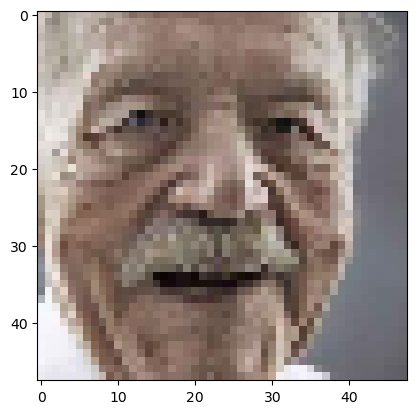

In [9]:
plt.imshow(images[0])

In [10]:
print(ages[87])

10


In [11]:
print(genders[66])

0


In [12]:
#saving array age gender image into array
images_f=np.array(images)
ages_f=np.array(ages)
genders_f=np.array(genders)

In [13]:
np.save(folder+'image.npy',images_f)
np.save(folder+'ages.npy',ages_f)
np.save(folder+'genders.npy',genders_f)

<h3>Plotting Data /Visualization</h3>


In [14]:
#Find unique in gender
values, counts=np.unique(genders_f,return_counts=True)
print(counts)

[12391 11317]


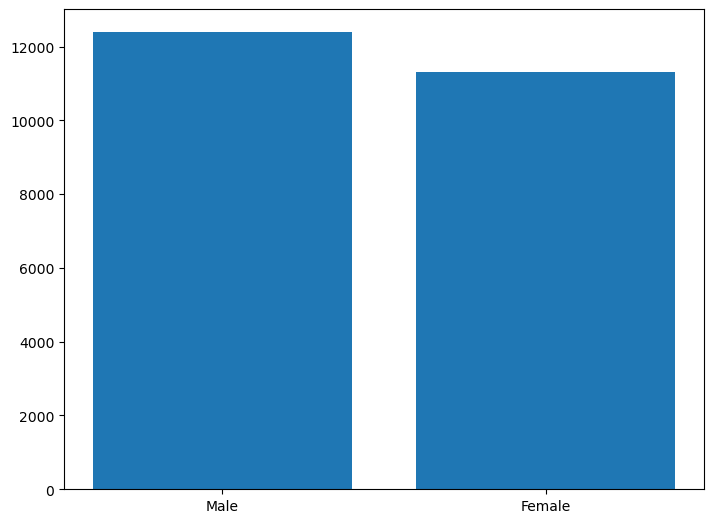

In [15]:
fig=plt.figure()
ax=fig.add_axes([0,0,1,1])
gender=['Male','Female']
values=[12391,11317]
ax.bar(gender,values)
plt.show()

In [16]:
#Find unique value in age
values,counts=np.unique(ages_f,return_counts=True)
print(counts)

[1123  482  289  273  196  131  139  263  166  156   65  130   81  157
  177  247  158  262   98  284  346  395  426  859  734 2197  615  918
  570  724  350  664  143  409  880  483  293  325  266  526  132  266
  157  100  440  153  170  153  148  381  138  232  241  353  268  236
   97  271   82  293  161  125  103   50  259   77   94  100   56  147
   33   98   63   32  148   58   28   69   23  133   22   40   18   24
  155   35   10   34   33   82    2   13    5    9   17    9   11    2
    1    5    5    1    3    4]


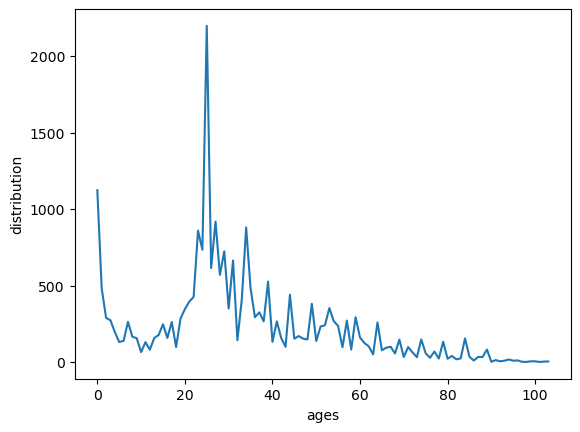

In [17]:
plt.plot(counts)
plt.xlabel('ages')
plt.ylabel('distribution')
plt.show()

<h3> Splittting Data Set Into train_test_split </h3>

In [18]:
##splitting data set

labels=[]
i=0
while i<len(ages):
    label=[]
    label.append(ages[i])
    label.append(genders[i])
    labels.append(label)
    i=i+1


In [19]:
#spliting dataset
images_f_2=images_f/255


In [20]:
images_f_2.shape

(23708, 48, 48, 3)

In [21]:
labels_f=np.array(labels)

In [22]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(images_f_2,labels_f,test_size=0.25)

In [23]:
y_train[0:5]

array([[ 2,  1],
       [19,  1],
       [10,  0],
       [50,  0],
       [16,  1]])

#Again splitting Dateset for better learning

In [24]:
y_train_2=[y_train[:,1],y_train[:,0]]
y_test_2=[y_test[:,1],y_test[:,0]]

In [25]:
y_train_2[0][0:5]

array([1, 1, 0, 0, 1])

In [26]:
y_train_2[1][0:5]

array([ 2, 19, 10, 50, 16])

<h3>Building a Model</h3>
#Maxpooling along with Convolution layer

In [27]:


def Convolution(input_tensor,filters):
    x=Conv2D(filters=filters,kernel_size=(3,3),padding="same",strides=(1,1),kernel_regularizer=l2(0.001))(input_tensor)
    x=Dropout(0.1)(x)
    x=Activation('relu')(x)
    return x

In [28]:
def model(input_shape):
    inputs=Input((input_shape))
    conv_1=Convolution(inputs,32)
    maxp_1=MaxPool2D(pool_size=(2,2))(conv_1)
    conv_2=Convolution(maxp_1,64)
    maxp_2=MaxPool2D(pool_size=(2,2))(conv_2)
    conv_3=Convolution(maxp_2,128)
    maxp_3=MaxPool2D(pool_size=(2,2))(conv_3)
    conv_4=Convolution(maxp_3,256)
    maxp_4=MaxPool2D(pool_size=(2,2))(conv_4)
    flatten= Flatten()(maxp_4)
    dense_1=Dense(64,activation='relu')(flatten)
    dense_2=Dense(64,activation='relu')(flatten)
    drop_1=Dropout(0.2)(dense_1)
    drop_2=Dropout(0.2)(dense_2)
    output_1=Dense(1,activation='sigmoid',name='sex_out')(drop_1)
    output_2=Dense(1,activation='relu',name='age_out')(drop_2)
    model=Model(inputs=[inputs],outputs=[output_1,output_2])
    model.compile(loss=["binary_crossentropy","mse"],optimizer="Adam",metrics=["accuracy","accuracy"])
    return model    

In [29]:
Model=model((48,48,3))
    
    

In [30]:
#summary of the model
Model.summary()

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer         │ (None, 48, 48, 3) │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d (Conv2D)     │ (None, 48, 48,    │        896 │ input_layer[0][0] │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout (Dropout)   │ (None, 48, 48,    │          0 │ conv2d[0][0]      │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ activation          │ (None, 48, 48,    │          0 │ dropout[0][0]     │
│ (Activation)        │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling2d       │ (None, 24, 24,    │          0 │ activation[0][0]  │
│ (MaxPooling2D)      │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_1 (Conv2D)   │ (None, 24, 24,    │     18,496 │ max_pooling2d[0]… │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout_1 (Dropout) │ (None, 24, 24,    │          0 │ conv2d_1[0][0]    │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ activation_1        │ (None, 24, 24,    │          0 │ dropout_1[0][0]   │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling2d_1     │ (None, 12, 12,    │          0 │ activation_1[0][… │
│ (MaxPooling2D)      │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_2 (Conv2D)   │ (None, 12, 12,    │     73,856 │ max_pooling2d_1[… │
│                     │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout_2 (Dropout) │ (None, 12, 12,    │          0 │ conv2d_2[0][0]    │
│                     │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ activation_2        │ (None, 12, 12,    │          0 │ dropout_2[0][0]   │
│ (Activation)        │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling2d_2     │ (None, 6, 6, 128) │          0 │ activation_2[0][… │
│ (MaxPooling2D)      │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_3 (Conv2D)   │ (None, 6, 6, 256) │    295,168 │ max_pooling2d_2[… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout_3 (Dropout) │ (None, 6, 6, 256) │          0 │ conv2d_3[0][0]    │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ activation_3        │ (None, 6, 6, 256) │          0 │ dropout_3[0][0]   │
│ (Activation)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling2d_3     │ (None, 3, 3, 256) │          0 │ activation_3[0][… │
│ (MaxPooling2D)      │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼─────────────────

 Total params: 683,586 (2.61 MB)

 Trainable params: 683,586 (2.61 MB)

 Non-trainable params: 0 (0.00 B)

In [31]:
from tensorflow.keras.callbacks import ModelCheckpoint


In [32]:
file_s='Age_Sex_Detection.keras'
checkpoint=ModelCheckpoint(file_s,monitor='val_loss',verbose=1,save_best_only=True,save_weights_only=False,mode='auto',save_freq='epoch')
Early_stop=tf.keras.callbacks.EarlyStopping(patience=75,monitor='val_loss',restore_best_weights=True)
callback_list=[checkpoint,Early_stop]

In [33]:
print(file_s)

Age_Sex_Detection.keras


In [34]:
History=Model.fit(x_train,y_train_2,batch_size=64,validation_data=(x_test,y_test_2),epochs=250,callbacks=callback_list)


Epoch 1/250
278/278 ━━━━━━━━━━━━━━━━━━━━ 0s 162ms/step - age_out_accuracy: 0.0448 - loss: 489.2063 - sex_out_accuracy: 0.5210
Epoch 1: val_loss improved from inf to 274.73318, saving model to Age_Sex_Detection.keras
278/278 ━━━━━━━━━━━━━━━━━━━━ 56s 178ms/step - age_out_accuracy: 0.0448 - loss: 488.8748 - sex_out_accuracy: 0.5211 - val_age_out_accuracy: 0.0477 - val_loss: 274.7332 - val_sex_out_accuracy: 0.5973
Epoch 2/250
278/278 ━━━━━━━━━━━━━━━━━━━━ 0s 159ms/step - age_out_accuracy: 0.0464 - loss: 242.1361 - sex_out_accuracy: 0.6706
Epoch 2: val_loss did not improve from 274.73318
278/278 ━━━━━━━━━━━━━━━━━━━━ 48s 171ms/step - age_out_accuracy: 0.0464 - loss: 242.0894 - sex_out_accuracy: 0.6707 - val_age_out_accuracy: 0.0423 - val_loss: 296.1816 - val_sex_out_accuracy: 0.7204
Epoch 3/250
278/278 ━━━━━━━━━━━━━━━━━━━━ 0s 160ms/step - age_out_accuracy: 0.0435 - loss: 189.1086 - sex_out_accuracy: 0.7051
Epoch 3: val_loss improved from 274.73318 to 252.17874, saving model to Age_Sex_Detecti

<h3>Plotting model/Result</h3>

In [35]:
#evaluation
Model.evaluate(x_test,y_test_2)

186/186 ━━━━━━━━━━━━━━━━━━━━ 4s 22ms/step - age_out_accuracy: 0.0508 - loss: 97.1347 - sex_out_accuracy: 0.8479


[93.62362670898438, 0.047241438180208206, 0.8555761575698853]

In [36]:
#Predict
pred=Model.predict(x_test)
pred[0:3]

186/186 ━━━━━━━━━━━━━━━━━━━━ 4s 21ms/step


[array([[0.6977765 ],
        [0.99442744],
        [0.40869868],
        ...,
        [0.4791004 ],
        [0.990915  ],
        [0.15071476]], dtype=float32),
 array([[37.404663 ],
        [23.56337  ],
        [ 5.4524593],
        ...,
        [27.065613 ],
        [29.414394 ],
        [74.11185  ]], dtype=float32)]

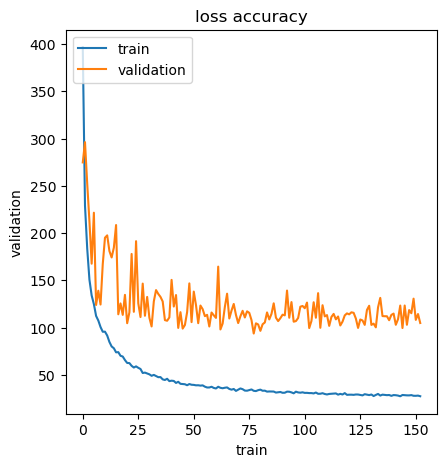

In [37]:
#plotting between loss and val_loss

plt.plot(History.history['loss'])
plt.plot(History.history['val_loss'])
plt.title('loss accuracy')
plt.xlabel('train')
plt.ylabel('validation')
plt.legend(['train','validation'],loc='upper left')
plt.subplots_adjust(top=1.0,bottom=0.2,right=0.88,left=0.3,hspace=0.25,wspace=0.35)

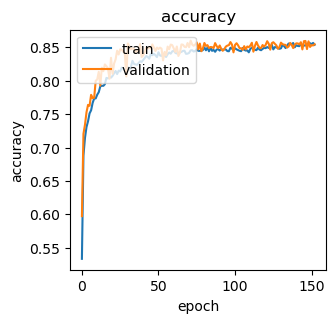

In [38]:
#Plotting between sex_out_accuracy and val_sex_out_accuracy
plt.plot(History.history['sex_out_accuracy'])
plt.plot(History.history['val_sex_out_accuracy'])
plt.title('accuracy')
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.legend(['train','validation'],loc='upper left')
plt.subplots_adjust(top=0.5,bottom=0,right=0.9,left=0.5,hspace=0.34,wspace=0.25)

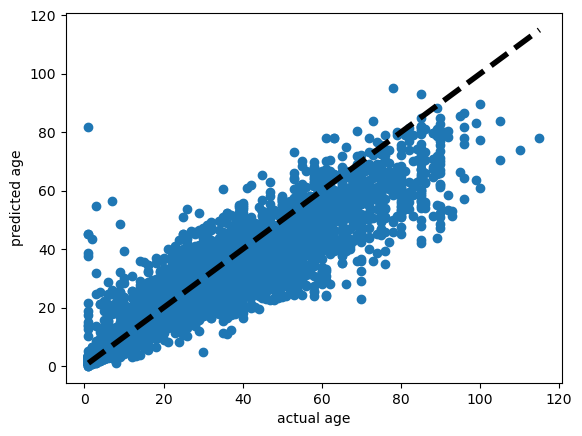

In [39]:
 #Plotting Gender Accuracy
fig,ax=plt.subplots()
ax.scatter(y_test_2[1],pred[1])
ax.plot([y_test_2[1].min(),y_test_2[1].max()],[y_test_2[1].min(),y_test_2[1].max()],'k--',lw=4)
ax.set_xlabel('actual age')
ax.set_ylabel('predicted age')
plt.show()

<h3>Reporting and Checking Model</h3>

In [40]:
    
i=0
pred_1=[]

while (i<len(pred[0])):
    pred_1.append(int(np.round(pred[0][i])))
    i=i+1
    

C:\Users\tusha\AppData\Local\Temp\ipykernel_13920\3206728670.py:5: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  pred_1.append(int(np.round(pred[0][i])))


In [41]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

In [42]:
report=classification_report(y_test_2[0],pred_1)


In [43]:
#Classification Report
print(report)

              precision    recall  f1-score   support

           0       0.86      0.86      0.86      3057
           1       0.85      0.85      0.85      2870

    accuracy                           0.86      5927
   macro avg       0.86      0.86      0.86      5927
weighted avg       0.86      0.86      0.86      5927



In [44]:
result=confusion_matrix(y_test_2[0],pred_1)

<Axes: >

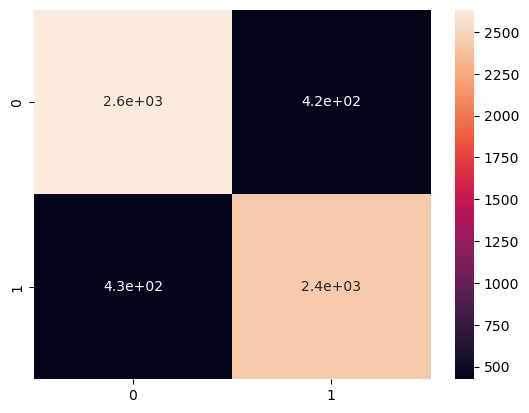

In [45]:
#import seaborn 
import seaborn as sns
sns.heatmap(result,annot=True)

<h3>Test And Checking Model</h3>

In [51]:
def test_image(ind,images_f,image_f_2,Model):
    plt.imshow(images_f[ind])
    image_test=images_f_2[ind]
    pred_1=Model.predict(np.array([image_test]))
    sex_f=['Male','Female']
    age=int(np.round(pred_1[1][0]))
    sex=int(np.round(pred_1[0][0]))
    print("predicted age is " +str(age))
    print("predicted gender is " +sex_f[sex])

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
predicted age is 61
predicted gender is Female


C:\Users\tusha\AppData\Local\Temp\ipykernel_13920\2706408215.py:6: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  age=int(np.round(pred_1[1][0]))
C:\Users\tusha\AppData\Local\Temp\ipykernel_13920\2706408215.py:7: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  sex=int(np.round(pred_1[0][0]))


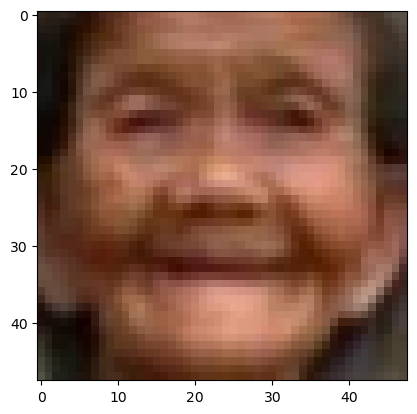

In [52]:
#test case-1
test_image(8,images_f,images_f_2,Model)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
predicted age is 7
predicted gender is Male


C:\Users\tusha\AppData\Local\Temp\ipykernel_13920\2706408215.py:6: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  age=int(np.round(pred_1[1][0]))
C:\Users\tusha\AppData\Local\Temp\ipykernel_13920\2706408215.py:7: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  sex=int(np.round(pred_1[0][0]))


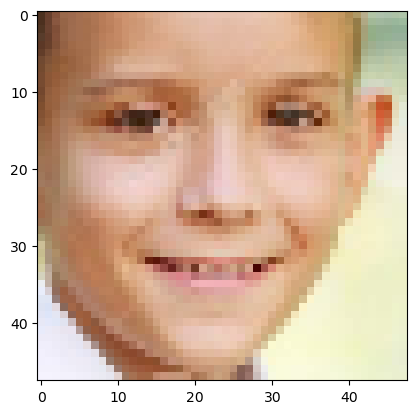

In [53]:
#test case-2
test_image(38,images_f,images_f_2,Model)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
predicted age is 10
predicted gender is Male


C:\Users\tusha\AppData\Local\Temp\ipykernel_13920\2706408215.py:6: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  age=int(np.round(pred_1[1][0]))
C:\Users\tusha\AppData\Local\Temp\ipykernel_13920\2706408215.py:7: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  sex=int(np.round(pred_1[0][0]))


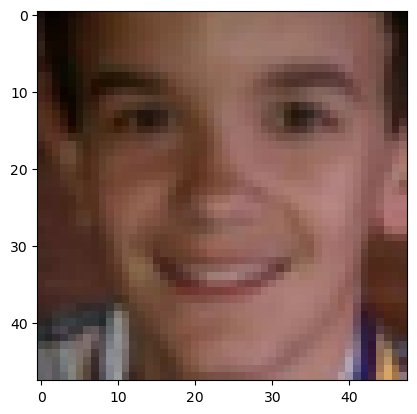

In [54]:
#test case-3
test_image(23,images_f,images_f_2,Model)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step
predicted age is 32
predicted gender is Male


C:\Users\tusha\AppData\Local\Temp\ipykernel_13920\2706408215.py:6: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  age=int(np.round(pred_1[1][0]))
C:\Users\tusha\AppData\Local\Temp\ipykernel_13920\2706408215.py:7: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  sex=int(np.round(pred_1[0][0]))


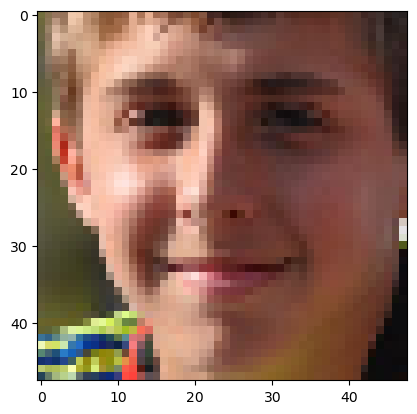

In [55]:
#test case-4
test_image(888,images_f,images_f_2,Model)